# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Load Data

In [ ]:
#loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# Subset 0,1

In [ ]:
# subsetting for classes 0,1 only

x_train = x_train[np.logical_or(y_train == 0, y_train == 1)]
y_train = y_train[np.logical_or(y_train == 0, y_train == 1)]

x_test = x_test[np.logical_or(y_test == 0, y_test == 1)]
y_test = y_test[np.logical_or(y_test == 0, y_test == 1)]

In [ ]:
np.unique(y_train), np.unique(y_test)

(array([0, 1], dtype=uint8), array([0, 1], dtype=uint8))

# Flatten Data

In [ ]:
x_train=x_train.reshape(len(x_train),-1)
x_test=x_test.reshape(len(x_test),-1)

# Standardize Data

In [ ]:
x_train=(x_train-np.mean(x_train,axis=0))/(np.std(x_train,axis=0)+10e-16)
x_test=(x_test-np.mean(x_test,axis=0))/(np.std(x_test,axis=0)+10e-16)

# Sigmoid Function

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Cost Function

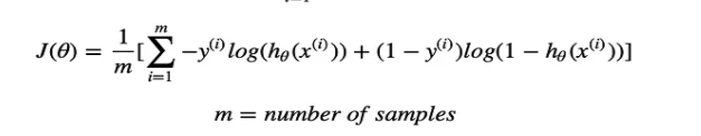

In [ ]:
def cost_function(phiz, y_train):
    return (y_train * np.log(phiz) - (1 - y_train) * np.log(1 - phiz)).mean()

# Initialize Parameters


*  np.random.rand() generates random numbers from a uniform distribution.

*   
np.random.randn() generates random numbers from a standard normal distribution.

*   np.random.randint() generates random integers within a specified range.












In [ ]:
w=np.random.rand(784)
b=np.random.rand(1)

In [ ]:
w

array([0.1363079 , 0.37933918, 0.37102176, 0.13427884, 0.26341269,
       0.76226287, 0.15293356, 0.30466228, 0.53350651, 0.75577249,
       0.67147224, 0.58229596, 0.53506442, 0.10232621, 0.30528595,
       0.53761615, 0.77043045, 0.96433142, 0.84136869, 0.73189857,
       0.72355513, 0.88672345, 0.25237227, 0.41335682, 0.98861558,
       0.69613968, 0.94667451, 0.21856575, 0.94941984, 0.60162646,
       0.30466827, 0.65749082, 0.16532513, 0.95618848, 0.26721856,
       0.98248581, 0.05201539, 0.34979438, 0.43563426, 0.01248749,
       0.11842302, 0.64289692, 0.21191642, 0.65607448, 0.1149254 ,
       0.21980067, 0.15562414, 0.08705475, 0.69979482, 0.80777631,
       0.22489751, 0.90700459, 0.06928292, 0.78856688, 0.74335427,
       0.04384611, 0.16280102, 0.84081488, 0.78472974, 0.71891843,
       0.77490503, 0.6946525 , 0.73864967, 0.21376634, 0.90541009,
       0.36728115, 0.2864266 , 0.24060604, 0.53597389, 0.59781868,
       0.0042862 , 0.85483715, 0.46830628, 0.69835716, 0.50239

In [ ]:
w.shape

(784,)

In [ ]:
x_train.shape

(12665, 784)

In [ ]:
epochs=1000
tolerance = 10e-8
Cost=np.zeros(epochs)
eta=0.1

# Gradient Descent Function

In [ ]:
def Gradient_Descent(X_train,Y_train,w,b,epochs,eta):
    for i in range (epochs):
          z=np.dot(x_train,w.T)+b
          phiZ = sigmoid(z)
          Cost[i] =cost_function(phiZ, y_train)
          w = w - (eta * np.dot((phiZ - y_train).T , x_train)) /len(x_train)
          b = b - eta * np.mean(phiZ - y_train)
          if (Cost[i]<tolerance):
            break;
    return w,b

In [ ]:
w,b=Gradient_Descent(x_train,y_train,w,b,epochs,eta)

# Test Data

In [ ]:
# Test with same data and look at the accuracy
z=np.dot(x_test,w)+b
y_pred =sigmoid(z)
for i in range(len(y_pred)):
  if (y_pred[i]>0.5):   #Threshhold
     y_pred[i]=1
  else:
     y_pred[i]=0


accuracy=np.mean(np.equal(y_pred, y_test))*100

In [ ]:
accuracy

99.71631205673759

# Confusion_Matrix

In [ ]:
con_matrix=confusion_matrix(y_test,y_pred)

Text(0.5, 23.52222222222222, 'Predicted')

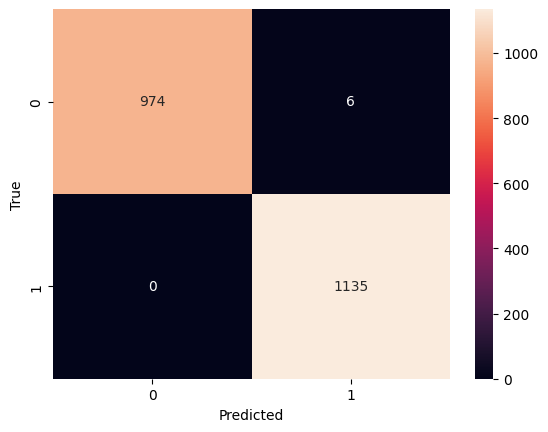

In [ ]:
sns.heatmap(con_matrix,annot=True,fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

#Classification_Report

In [ ]:
CR=classification_report(y_test,y_pred)
print(CR)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115

